# **Loan Eligibility Prediction Using Random Forest Classifier**

**Problem Statement:**

To automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. 

## Importing Libraries and Dataset

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from sklearn.model_selection import StratifiedKFold

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Data/train_ctrUa4K.csv')

# ***1. Exploratory Data Analysis***

1.Univariate Analysis

2. Bivariate Analysis

3. Correlation

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
#turn loan status into binary 
modified=train
modified['Loan_Status']=train['Loan_Status'].apply(lambda x: 0 if x=="N" else 1 )
#calculate the mean
modified.groupby('Credit_History').mean()['Loan_Status']

Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64

As we can observe, applicants with credit_history have very high chances of getting loan.

In [ ]:
modified['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [ ]:
modified['Loan_Status']

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [ ]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

## ***Data Visualization***

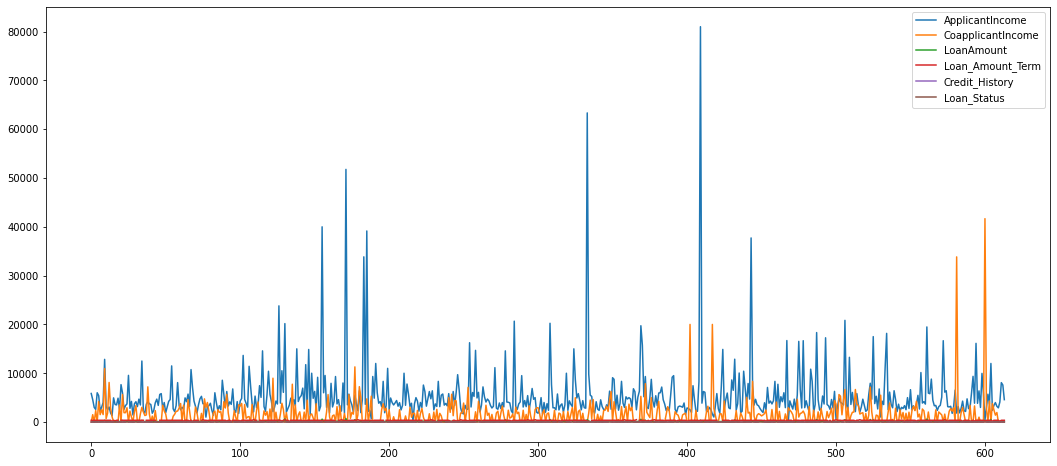

In [ ]:
train.plot(figsize=(18, 8))

plt.show()

## **Univariate Analysis**

Exploring each of the variable available in the dataset.

In [ ]:
train['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [ ]:
train['Loan_Status'].value_counts(normalize=True)

1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64

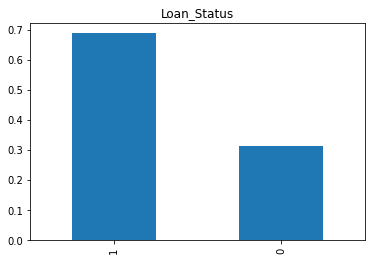

In [ ]:
train['Loan_Status'].value_counts(normalize=True).plot.bar(title='Loan_Status')

In [ ]:
df2 = train
df2 = df2.drop(columns=['Loan_ID'])
## getting categorical columns
cat = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Credit_History',
 'Loan_Amount_Term']

In [ ]:
# Numerical Data
num = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'LoanAmountLog', 'TotalIncome', 'TotalIncomeLog']
num

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'LoanAmountLog',
 'TotalIncome',
 'TotalIncomeLog']

Different types of variables are **Categorical**, **Ordinal**, and **Numerical**.

**Categorical features**: These features have categories 

- Gender, Married, Self_Employed, Credit_History, Loan_Status.

**Ordinal features**: Variables in categorical features having some order involved 

- Dependents, Education, Property_Area.

**Numerical features**: These features have numerical values 

- ApplicantIncome, Co-applicantIncome, LoanAmount, TotalIncome, LoanAmountLog, TotalIncomeLog

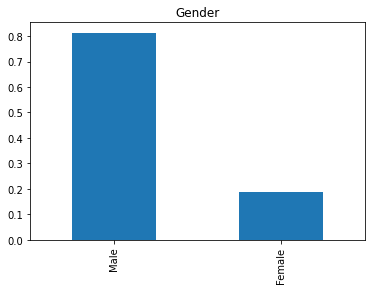

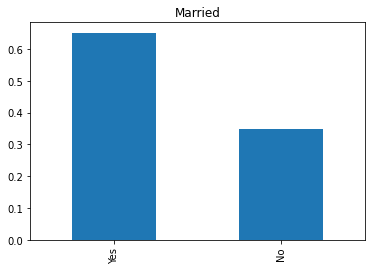

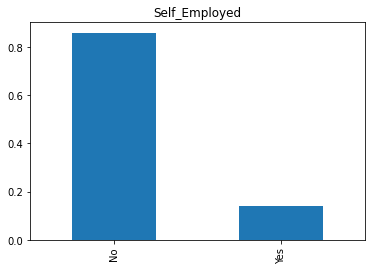

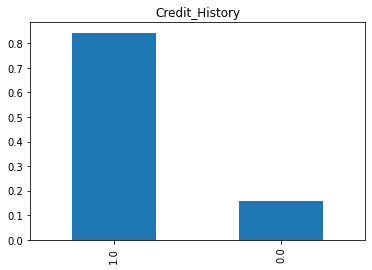

In [ ]:
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.show()
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

From the Above Dataset, we can say that -

- 80% of the Appliacnts are Male.
- 65% of the Applicants are Married.
- Approximately, 15% of the Applicants are self-employed.
- 85% of the Applicants have repaid their depts.

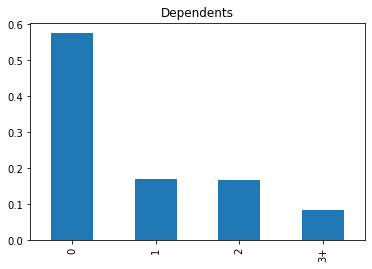

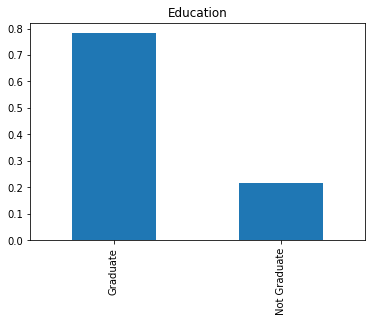

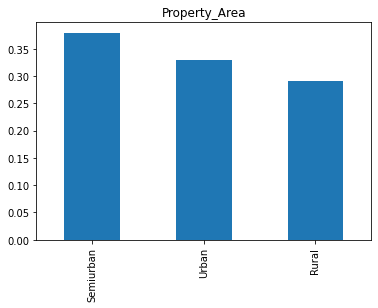

In [ ]:
train['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')
plt.show()
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

From the Above Dataset, we can say that -

- Most of the Applicants (Approx. 58%) does not have Dependents.
- Almost 80% of the Applicants are Graduated.
- Most of the Applicants (Approx. 40%) are from Semiurban Area.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


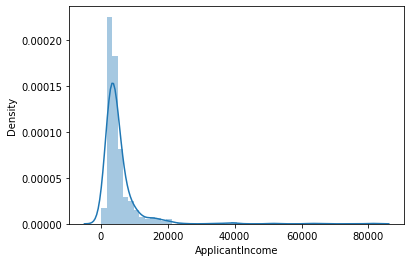

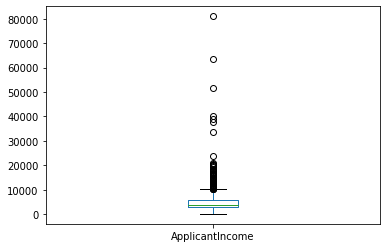

In [ ]:
sns.distplot(train['ApplicantIncome'])
plt.show()
train['ApplicantIncome'].plot.box()
plt.show()

As we can observe from the above plots that -

- Applicant Income is not Normally Distributed.
- Applicant Income contains a lot of Outliers.

we will handle the outlier during the preprocessing.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


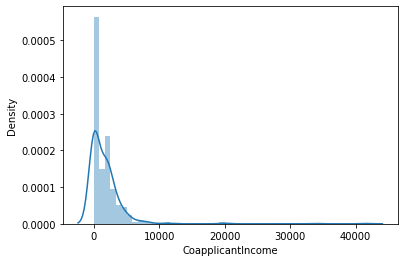

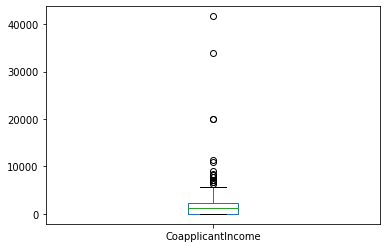

In [ ]:
sns.distplot(train['CoapplicantIncome'])
plt.show()
train['CoapplicantIncome'].plot.box()
plt.show()

Coapplicant's Income plot is similar to Applicant's Income plot,

- Coapplicant Income is not Normally Distributed.
- Coapplicant Income contains a lot of Outliers.

we will handle the outlier during the preprocessing.

And a majority of Coapplicant's Income ranges between 5000 to 10000.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


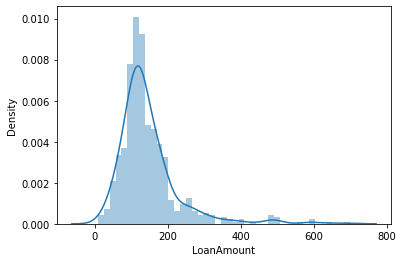

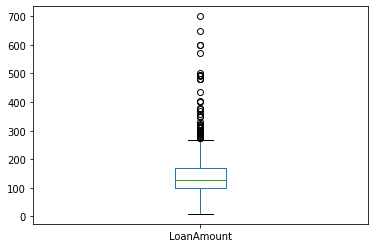

In [ ]:
train.notna()
sns.distplot(train['LoanAmount'])
plt.show()
train['LoanAmount'].plot.box()
plt.show()

As we can observe from the above plots that -

- Loan Amount plot is quite Normally Distributed.
- Loan Amount contains a lot of Outliers.

we will handle the outlier during the preprocessing.

## **Bivariate Analysis**

After looking at the univariate Analysis of each of the variables, we will explore the variables with respect to the target variable i.e. Loan_Status.

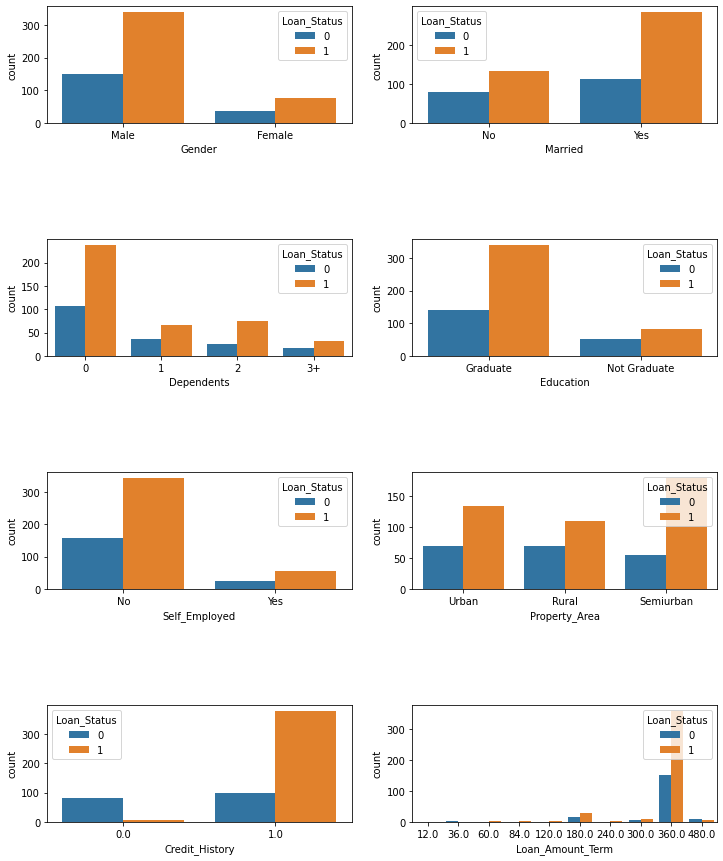

In [ ]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat in enumerate(cat):
    row,col = idx//2,idx%2
    sns.countplot(x=cat,data=train,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

## **From the above visualization, we can analyse that:**

1. In this dataset, there are more male applicants than female applicants.
2. Married applicants are more likely to get loan approval.
3. Applicants with zero dependents have higher chances getting loan approval.
4. Graduated applicants have higher chances of getting loan approval.
5. Most of the applicants in this dataset are not self-employed.
6. Applicants from semi-urban area are more likely to get loan approval.
7. Applicant with credit history are far more likely to be accepted.
8. Majority of the loans taken are for 360 Months (30 years).

## **Correlation between Numerical Data**

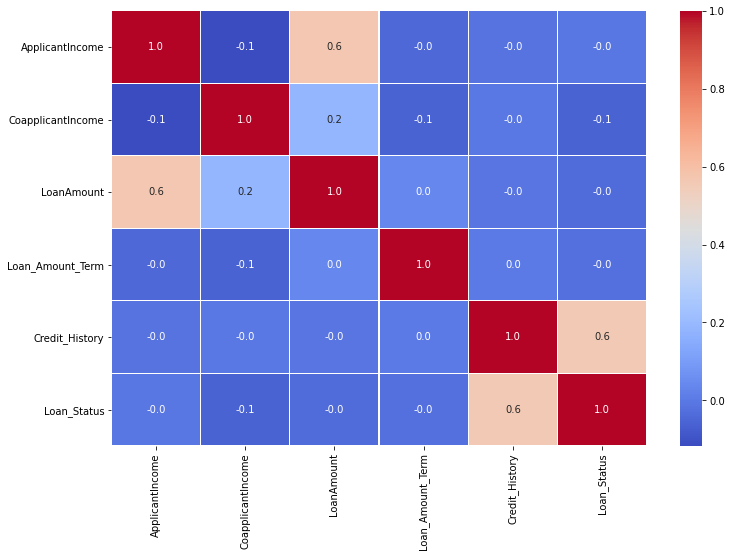

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

As we can see from the heatmap -

- **Applicant Income** and **Loan Amount** shows -> **High Correlation**
- **Credit History** and **Loan Status** shows -> **High Correlation**

# **Data Preprocessing**

Now we will -

1. Check and Handle Missing Values
2. Handle Outliers
3. check duplication
4. Label Encoding.
5. Drop the attributes that are not related to loan status.

In [ ]:
from google.colab import files

**Checking and Handling Missing Values**

In [ ]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

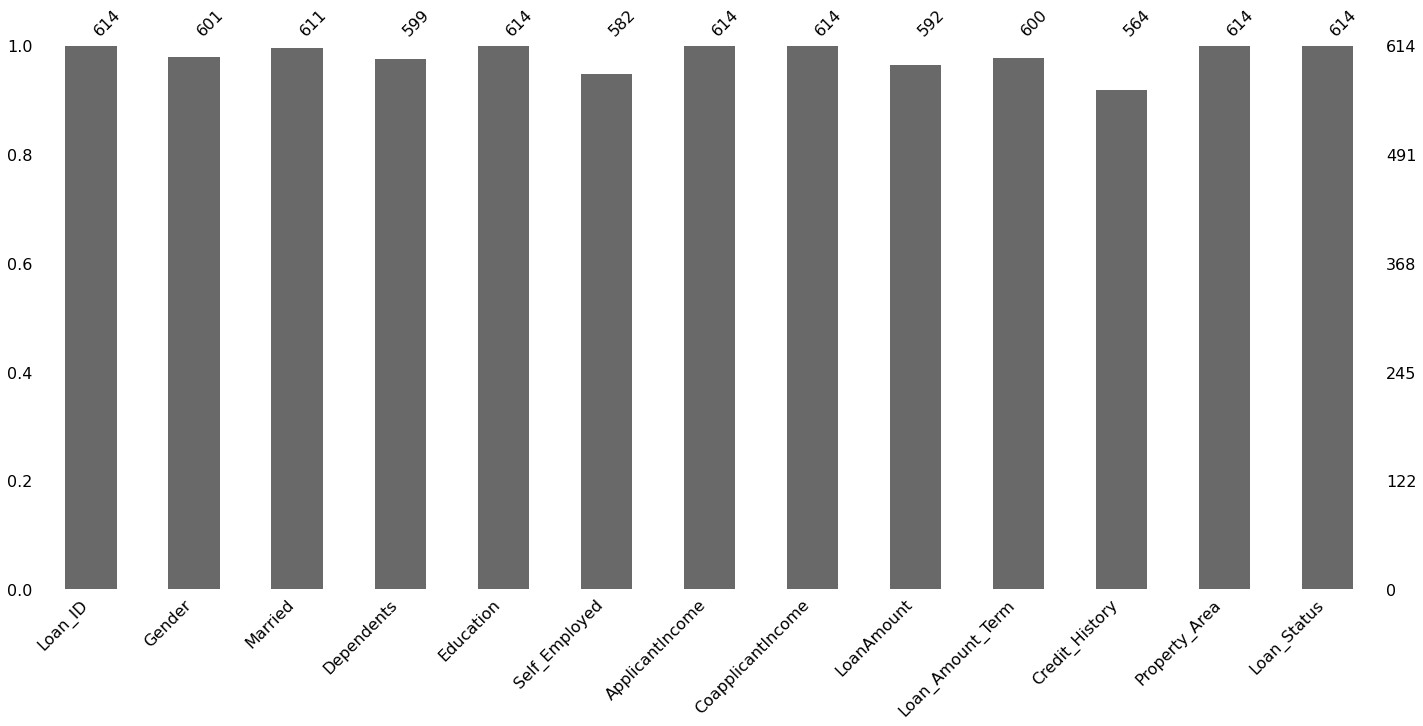

In [ ]:
msno.bar(train)

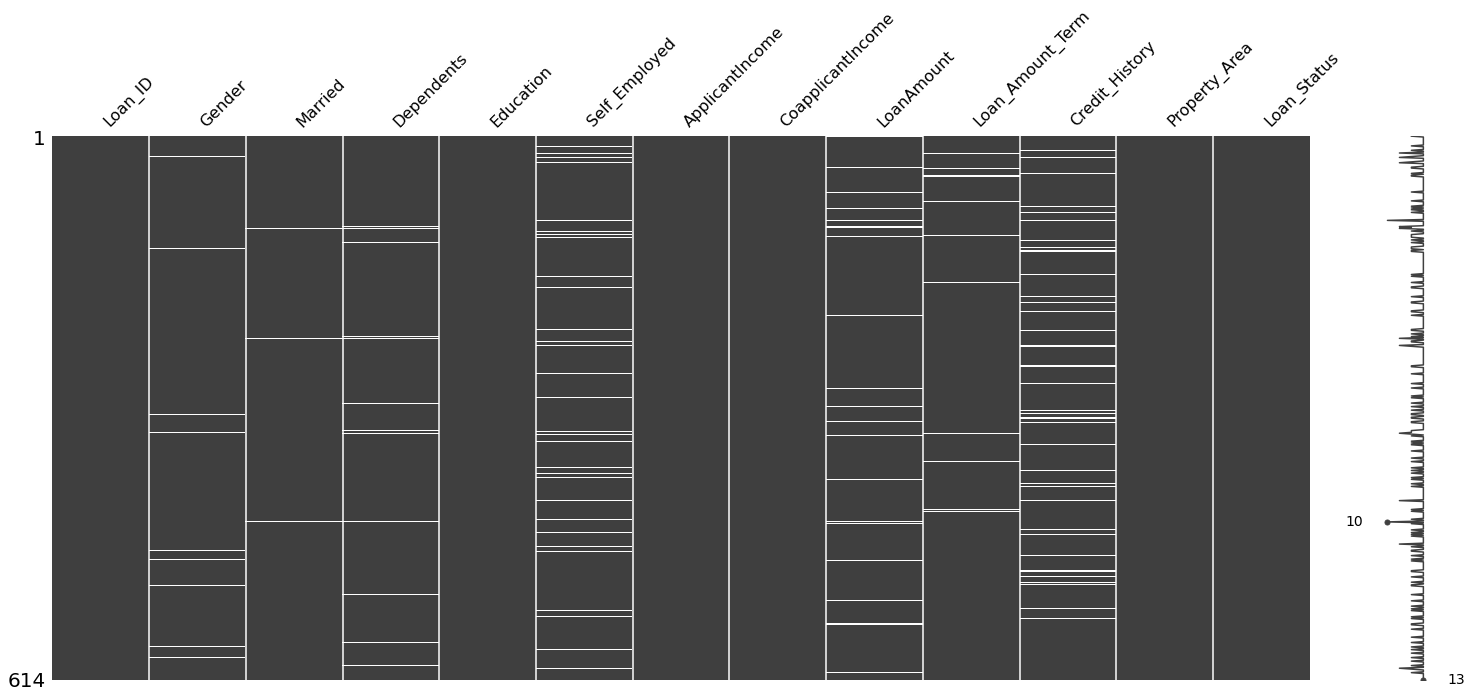

In [ ]:
msno.matrix(train)

In [ ]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace=True)
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Handling Outliers**

In [ ]:
train['LoanAmount'].head()

0    146.412162
1    128.000000
2     66.000000
3    120.000000
4    141.000000
Name: LoanAmount, dtype: float64

As we can see above, 'LoanAmount' contains outliers.

Taking Log of the LoanAmount can handle outliers.

In [ ]:
train['LoanAmountLog'] = np.log(train['LoanAmount'])
train['LoanAmountLog'].head()

0    4.986426
1    4.852030
2    4.189655
3    4.787492
4    4.948760
Name: LoanAmountLog, dtype: float64

In [ ]:
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train['TotalIncomeLog'] = np.log(train['TotalIncome'])
train['TotalIncomeLog'].head()

0    8.674026
1    8.714568
2    8.006368
3    8.505323
4    8.699515
Name: TotalIncomeLog, dtype: float64

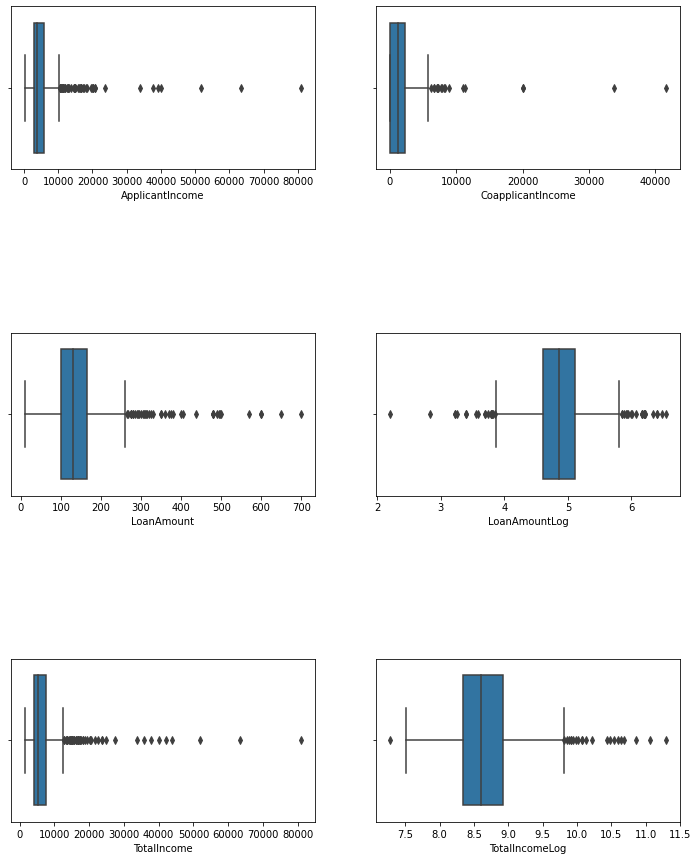

In [ ]:
fig,axes = plt.subplots(3,2,figsize=(12,15))
for idx,num in enumerate(num):
    row,col = idx//2,idx%2
    sns.boxplot(x=num,data=train,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)


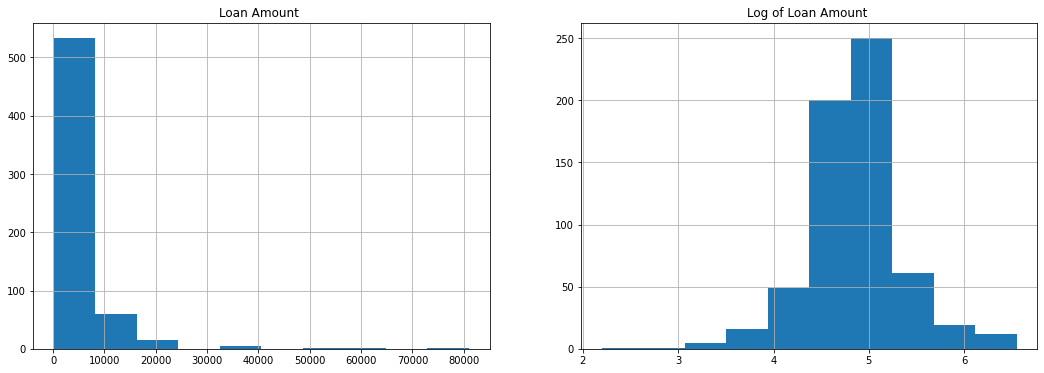

In [ ]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)


train['ApplicantIncome'].hist(bins=10)
plt.title("Loan Amount ")

plt.subplot(1, 2, 2)
plt.grid()
plt.hist(np.log(train['LoanAmount']))
plt.title("Log of Loan Amount ")

plt.show()

From the visualization, we can see there is no significant impact of numeircal data on the loan status.

But we can see the log of numerical data (i.e. LoanAmount) eliminates the outliers.

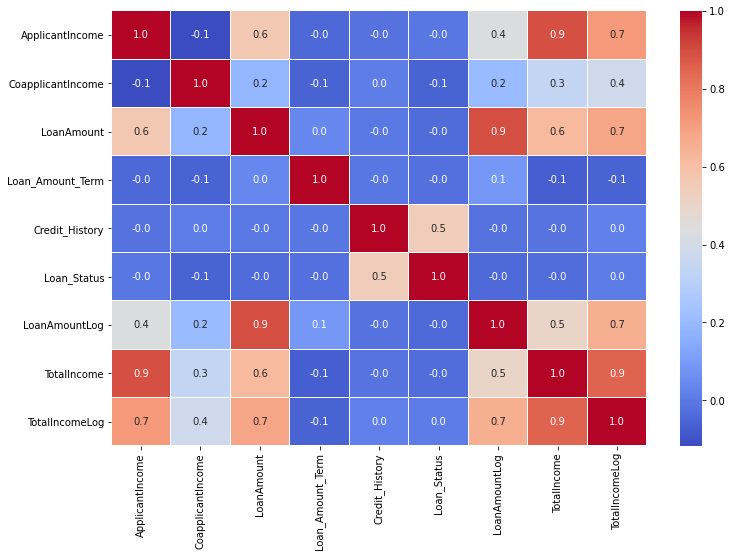

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

### **Duplication**

In [ ]:
train[train.duplicated()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmountLog,TotalIncome,TotalIncomeLog


**No Duplication**

In [ ]:
df2 = train
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmountLog,TotalIncome,TotalIncomeLog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1,4.986426,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1,4.948760,6000.0,8.699515


### **Label Encoding**

In [ ]:
df3.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'LoanAmountLog', 'TotalIncome', 'TotalIncomeLog',
       'Applicant_obligation', 'Coapplicant_obligation', 'eligibility_score',
       'applicantE', 'coapplicantE', 'multiplier'],
      dtype='object')

In [ ]:
df3.describe()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmountLog,TotalIncome,TotalIncomeLog,Applicant_obligation,Coapplicant_obligation,eligibility_score,applicantE,coapplicantE,multiplier
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,146.412162,342.410423,0.855049,1.037459,0.687296,4.862066,7024.705081,8.669414,99.154723,72.333876,73606.206058,57014.842020,16591.364039,10.811075
std,0.386497,0.476373,1.009623,0.413389,0.340446,84.037468,64.428629,0.352339,0.787482,0.463973,0.496575,6458.663872,0.545102,57.584271,42.437259,67027.109263,63606.980381,30169.338778,0.733808
min,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,2.197225,1442.000000,7.273786,1.000000,0.000000,14553.000000,946.000000,-1937.000000,9.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000,4.607658,4166.000000,8.334712,46.000000,36.000000,43087.000000,29243.500000,-662.250000,11.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,129.000000,360.000000,1.000000,1.000000,1.000000,4.859812,5416.500000,8.597205,101.000000,72.000000,56969.000000,39968.500000,12324.000000,11.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,164.750000,360.000000,1.000000,2.000000,1.000000,5.104426,7521.750000,8.925549,146.000000,108.000000,77774.000000,61370.000000,24395.250000,11.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,700.000000,480.000000,1.000000,2.000000,1.000000,6.551080,81000.000000,11.302204,199.000000,149.000000,888041.000000,889493.000000,374760.000000,13.000000


In [ ]:
df2.Gender = df2.Gender.replace({"Male": 1, "Female" : 0})

df2.Married = df2.Married.replace({"Yes": 1, "No" : 0})

df2.Self_Employed = df2.Self_Employed.replace({"Yes": 1, "No" : 0})

df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmountLog,TotalIncome,TotalIncomeLog
0,LP001002,1,0,0,Graduate,0,5849,0.0,146.412162,360.0,1.0,Urban,1,4.986426,5849.0,8.674026
1,LP001003,1,1,1,Graduate,0,4583,1508.0,128.000000,360.0,1.0,Rural,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,Graduate,1,3000,0.0,66.000000,360.0,1.0,Urban,1,4.189655,3000.0,8.006368
3,LP001006,1,1,0,Not Graduate,0,2583,2358.0,120.000000,360.0,1.0,Urban,1,4.787492,4941.0,8.505323
4,LP001008,1,0,0,Graduate,0,6000,0.0,141.000000,360.0,1.0,Urban,1,4.948760,6000.0,8.699515


In [ ]:
from sklearn.preprocessing import LabelEncoder
feature_col = ['Property_Area','Education', 'Dependents']
le = LabelEncoder()
for col in feature_col:
    df2[col] = le.fit_transform(df2[col])
    df2[col] = le.fit_transform(df2[col])

In [ ]:
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmountLog,TotalIncome,TotalIncomeLog
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426,5849.0,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515


In [ ]:
df2['Education'].value_counts()

0    480
1    134
Name: Education, dtype: int64

### **Drop Unwanted Variable**

In [ ]:
X = df2.drop(columns='Loan_ID')

In [ ]:
X = X.drop(columns='Loan_Status')

In [ ]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmountLog,TotalIncome,TotalIncomeLog
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,4.986426,5849.0,8.674026
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,4.852030,6091.0,8.714568
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,4.189655,3000.0,8.006368
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,4.787492,4941.0,8.505323
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,4.262680,2900.0,7.972466
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,3.688879,4106.0,8.320205
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,5.533389,8312.0,9.025456
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,5.231109,7583.0,8.933664


In [ ]:
y = train['Loan_Status']
y.head(10)

0    1
1    0
2    1
3    1
4    1
5    1
6    1
7    0
8    1
9    0
Name: Loan_Status, dtype: int64

In [ ]:
df2.shape

(614, 16)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import brier_score_loss
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

## **Train and Test Dataset Splitting**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)

In [ ]:
X_train.shape

(491, 14)

In [ ]:
y_train.shape

(491,)

In [ ]:
X_test.shape

(123, 14)

In [ ]:
y_test.shape

(123,)

In [ ]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmountLog,TotalIncome,TotalIncomeLog
154,1,0,0,0,0,3254,0.0,50.0,360.0,1.0,2,3.912023,3254.0,8.087640
239,1,1,1,0,0,3315,0.0,96.0,360.0,1.0,1,4.564348,3315.0,8.106213
448,1,1,2,0,0,3340,1710.0,150.0,360.0,0.0,0,5.010635,5050.0,8.527144
471,1,1,1,1,0,2653,1500.0,113.0,180.0,0.0,0,4.727388,4153.0,8.331586
273,1,1,0,0,0,2620,2223.0,150.0,360.0,1.0,1,5.010635,4843.0,8.485290


# Normal Modeling

 - Without Eligibility Score feature



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_predict = rfc.predict(X_test)
y_predict

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0])

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import brier_score_loss
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
accuracy_score(y_test, y_predict)

0.8536585365853658

In [ ]:
precision_score(y_test, y_predict)

0.8681318681318682

In [ ]:
recall_score(y_test, y_predict)

0.9294117647058824

In [ ]:
f1_score(y_test, y_predict)

0.8977272727272727

# Normal Optimization

- optimization - RandomizedSeachCV

In [ ]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [ int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 4, 5, 10]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 4, 5, 10], 'bootstrap': [True, False]}


In [ ]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 100,
 'n_estimators': 2000}

In [ ]:
rfc_optimized = RandomForestClassifier(bootstrap = False,
 max_depth = 20,
 max_features = 'sqrt',
 min_samples_leaf = 5,
 min_samples_split = 100,
 n_estimators = 2000)

In [ ]:
rfc_optimized.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
prediction = rfc_optimized.predict(X_test)

In [ ]:
prediction

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0])

In [ ]:
accuracy_score(y_test, prediction)

0.8536585365853658

In [ ]:
precision_score(y_test, prediction)

0.845360824742268

In [ ]:
recall_score(y_test, prediction)

0.9647058823529412

In [ ]:
f1_score(y_test, prediction)

0.9010989010989011

# Eligibility Modeling

- With Eligibility Score Feature


In [ ]:
df2.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmountLog,TotalIncome,TotalIncomeLog
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.855049,1.037459,0.687296,4.862066,7024.705081,8.669414
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.787482,0.463973,0.496575,6458.663872,0.545102
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,2.197225,1442.000000,7.273786
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000,4.607658,4166.000000,8.334712
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000,4.859812,5416.500000,8.597205
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000,5.104426,7521.750000,8.925549
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000,6.551080,81000.000000,11.302204


In [ ]:
df3 = df2.drop(columns='Loan_ID')
df3['Applicant_obligation'] = np.random.randint(0,200, size=len(df3))  # Randomize obligations
df3['Coapplicant_obligation'] = np.random.randint(0,150, size=len(df3))

In [ ]:
df3

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmountLog,TotalIncome,TotalIncomeLog,Applicant_obligation,Coapplicant_obligation
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426,5849.0,8.674026,156,103
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568,1,138
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368,178,20
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323,166,6
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515,133,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1,4.262680,2900.0,7.972466,164,104
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1,3.688879,4106.0,8.320205,10,41
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1,5.533389,8312.0,9.025456,3,61
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1,5.231109,7583.0,8.933664,146,83


In [ ]:
df3['eligibility_score'] = 0 # 

In [ ]:
df3

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmountLog,TotalIncome,TotalIncomeLog,Applicant_obligation,Coapplicant_obligation,eligibility_score
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426,5849.0,8.674026,156,103,0
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568,1,138,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368,178,20,0
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323,166,6,0
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515,133,99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1,4.262680,2900.0,7.972466,164,104,0
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1,3.688879,4106.0,8.320205,10,41,0
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1,5.533389,8312.0,9.025456,3,61,0
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1,5.231109,7583.0,8.933664,146,83,0


In [ ]:
df3['applicantE'] = df3['ApplicantIncome'] - df3['Applicant_obligation']

In [ ]:
df3['coapplicantE'] = df3['CoapplicantIncome'] - df3['Coapplicant_obligation']

In [ ]:
data = df3['Loan_Amount_Term']
mul = []
for term in data:
  if term == 360.0:
    mul.append(11)
  elif term > 360.0:
    mul.append(13)
  else:
    mul.append(9)

mul


[11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 9,
 11,
 9,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 9,
 11,
 11,
 11,
 9,
 11,
 9,
 11,
 11,
 11,
 9,
 11,
 11,
 13,
 11,
 11,
 9,
 11,
 11,
 11,
 11,
 11,
 9,
 11,
 11,
 11,
 11,
 11,
 11,
 9,
 11,
 11,
 9,
 11,
 11,
 11,
 9,
 11,
 9,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 13,
 11,
 11,
 11,
 11,
 11,
 9,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 9,
 11,
 13,
 11,
 11,
 9,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 9,
 11,
 9,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 9,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 9,
 11,
 11,
 11,
 13,
 11,
 11,
 9,
 9,
 11,
 11,
 11,
 11,
 11,
 11,
 13,
 11,
 11,
 9,
 11,
 11,
 11,
 9,
 11,
 11,
 9,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 9,
 11,
 11,


In [ ]:
df3['multiplier'] = mul

In [ ]:
df3['multiplier'].value_counts()

11    526
9      73
13     15
Name: multiplier, dtype: int64

In [ ]:
df3

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmountLog,TotalIncome,TotalIncomeLog,Applicant_obligation,Coapplicant_obligation,eligibility_score,applicantE,coapplicantE,multiplier
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426,5849.0,8.674026,156,103,0,5693,-103.0,11
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568,1,138,0,4582,1370.0,11
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368,178,20,0,2822,-20.0,11
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323,166,6,0,2417,2352.0,11
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515,133,99,0,5867,-99.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1,4.262680,2900.0,7.972466,164,104,0,2736,-104.0,11
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1,3.688879,4106.0,8.320205,10,41,0,4096,-41.0,9
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1,5.533389,8312.0,9.025456,3,61,0,8069,179.0,11
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1,5.231109,7583.0,8.933664,146,83,0,7437,-83.0,11


In [ ]:
df3['applicantE'] = df3['applicantE'] * df3['multiplier']

In [ ]:
df3['coapplicantE'] = df3['coapplicantE'] * df3['multiplier']

In [ ]:
df3

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmountLog,TotalIncome,TotalIncomeLog,Applicant_obligation,Coapplicant_obligation,eligibility_score,applicantE,coapplicantE,multiplier
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426,5849.0,8.674026,156,103,0,62623,-1133.0,11
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568,1,138,0,50402,15070.0,11
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368,178,20,0,31042,-220.0,11
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323,166,6,0,26587,25872.0,11
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515,133,99,0,64537,-1089.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1,4.262680,2900.0,7.972466,164,104,0,30096,-1144.0,11
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1,3.688879,4106.0,8.320205,10,41,0,36864,-369.0,9
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1,5.533389,8312.0,9.025456,3,61,0,88759,1969.0,11
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1,5.231109,7583.0,8.933664,146,83,0,81807,-913.0,11


In [ ]:
df3['eligibility_score'] = df3['applicantE'] + df3['coapplicantE']

In [ ]:
df3

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmountLog,TotalIncome,TotalIncomeLog,Applicant_obligation,Coapplicant_obligation,eligibility_score,applicantE,coapplicantE,multiplier
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426,5849.0,8.674026,156,103,61490.0,62623,-1133.0,11
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568,1,138,65472.0,50402,15070.0,11
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368,178,20,30822.0,31042,-220.0,11
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323,166,6,52459.0,26587,25872.0,11
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515,133,99,63448.0,64537,-1089.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1,4.262680,2900.0,7.972466,164,104,28952.0,30096,-1144.0,11
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1,3.688879,4106.0,8.320205,10,41,36495.0,36864,-369.0,9
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1,5.533389,8312.0,9.025456,3,61,90728.0,88759,1969.0,11
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1,5.231109,7583.0,8.933664,146,83,80894.0,81807,-913.0,11


In [ ]:
df3.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmountLog,TotalIncome,TotalIncomeLog,Applicant_obligation,Coapplicant_obligation,eligibility_score,applicantE,coapplicantE,multiplier
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.855049,1.037459,0.687296,4.862066,7024.705081,8.669414,99.154723,72.333876,73606.206058,57014.842020,16591.364039,10.811075
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.787482,0.463973,0.496575,6458.663872,0.545102,57.584271,42.437259,67027.109263,63606.980381,30169.338778,0.733808
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,2.197225,1442.000000,7.273786,1.000000,0.000000,14553.000000,946.000000,-1937.000000,9.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000,4.607658,4166.000000,8.334712,46.000000,36.000000,43087.000000,29243.500000,-662.250000,11.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000,4.859812,5416.500000,8.597205,101.000000,72.000000,56969.000000,39968.500000,12324.000000,11.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000,5.104426,7521.750000,8.925549,146.000000,108.000000,77774.000000,61370.000000,24395.250000,11.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000,6.551080,81000.000000,11.302204,199.000000,149.000000,888041.000000,889493.000000,374760.000000,13.000000


In [ ]:
df3 = df3.drop(columns=['ApplicantIncome','CoapplicantIncome'])

In [ ]:
X2 = df3.drop(columns = 'Loan_Status')

In [ ]:
y2 = df3['Loan_Status']

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.2,stratify =y,random_state =42)

In [ ]:
rfc2 = RandomForestClassifier()
rfc2.fit(X_train2, y_train2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_predict2 = rfc2.predict(X_test2)

In [ ]:
accuracy_score(y_test2, y_predict2)

0.8373983739837398

In [ ]:
precision_score(y_test2, y_predict2)

0.8421052631578947

In [ ]:
recall_score(y_test2, y_predict2)

0.9411764705882353

In [ ]:
f1_score(y_test2, y_predict2)

0.8888888888888888

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

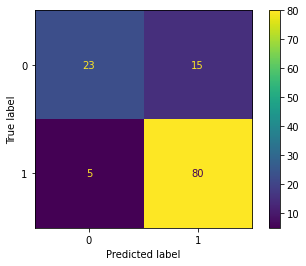

In [ ]:
plot_confusion_matrix(rfc2, X_test2, y_test2)
plt.show()  

# Eligibility Optimization

- optimization - RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [ int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 4, 5, 10]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 4, 5, 10], 'bootstrap': [True, False]}


In [ ]:
rf2 = RandomForestClassifier()
rf_random2 = RandomizedSearchCV(estimator = rf2, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
rf_random2.fit(X_train2, y_train2)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_random2.best_params_

{'bootstrap': True,
 'max_depth': 60,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 100,
 'n_estimators': 1600}

In [ ]:
rfc2_optimized = RandomForestClassifier(bootstrap = True,
 max_depth = 60,
 max_features = 'auto',
 min_samples_leaf = 10,
 min_samples_split = 100,
 n_estimators = 1600)

In [ ]:
rfc2_optimized.fit(X_train2, y_train2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=60, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=1600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
prediction2 = rfc2_optimized.predict(X_test2)

In [ ]:
accuracy_score(y_test2, prediction2)

0.8536585365853658

In [ ]:
precision_score(y_test2, prediction2)

0.8316831683168316

In [ ]:
recall_score(y_test2, prediction2)

0.9882352941176471

In [ ]:
f1_score(y_test2, prediction2)

0.903225806451613

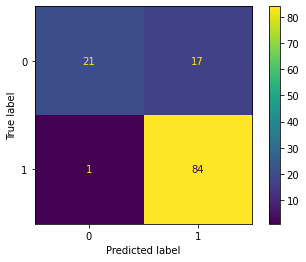

In [ ]:
plot_confusion_matrix(rfc2_optimized, X_test2, y_test2)
plt.show()  

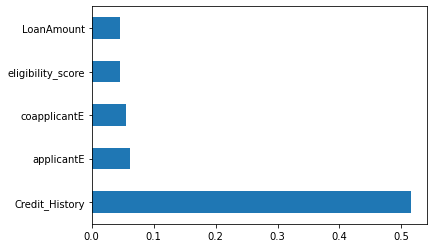

In [ ]:
feat_importances = pd.Series(rfc2_optimized.feature_importances_, index=X_train2.columns)
feat_importances.nlargest(5).plot(kind='barh')

In [ ]:
df3.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'LoanAmountLog', 'TotalIncome', 'TotalIncomeLog',
       'Applicant_obligation', 'Coapplicant_obligation', 'eligibility_score',
       'applicantE', 'coapplicantE', 'multiplier'],
      dtype='object')

In [ ]:
df3[df3['Loan_Status'] == 1]

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmountLog,TotalIncome,TotalIncomeLog,Applicant_obligation,Coapplicant_obligation,eligibility_score,applicantE,coapplicantE,multiplier
0,1,0,0,0,0,146.412162,360.0,1.0,2,1,4.986426,5849.0,8.674026,156,103,61490.0,62623,-1133.0,11
2,1,1,0,0,1,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368,178,20,30822.0,31042,-220.0,11
3,1,1,0,1,0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323,166,6,52459.0,26587,25872.0,11
4,1,0,0,0,0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515,133,99,63448.0,64537,-1089.0,11
5,1,1,2,0,1,267.000000,360.0,1.0,2,1,5.587249,9613.0,9.170872,170,140,102333.0,57717,44616.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,1,1,0,0,0,108.000000,360.0,1.0,0,1,4.682131,5182.0,8.552946,166,26,54890.0,33726,21164.0,11
609,0,0,0,0,0,71.000000,360.0,1.0,0,1,4.262680,2900.0,7.972466,164,104,28952.0,30096,-1144.0,11
610,1,1,3,0,0,40.000000,180.0,1.0,0,1,3.688879,4106.0,8.320205,10,41,36495.0,36864,-369.0,9
611,1,1,1,0,0,253.000000,360.0,1.0,2,1,5.533389,8312.0,9.025456,3,61,90728.0,88759,1969.0,11


In [ ]:
on = df3[df3['LoanAmount']<df3['eligibility_score']]
off = df3[df3['LoanAmount']>df3['eligibility_score']]

In [ ]:
on.shape

(614, 19)

In [ ]:
off.shape

(0, 19)

## **This shows that the loan amount always have to be less than the eligibility score in order to get approved**
Hence, it shows that the feature engineering has been accomplished right and according to the instructions and information received from the interview.

It could not further optimize

# **Rough Work**

In [ ]:
X3 = df3[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
  
y3 = df3['Loan_Status']

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3,test_size=0.2,stratify =y,random_state =42)

rfc3 = RandomForestClassifier()
rfc3.fit(X_train3, y_train3)
y_predict3 = rfc3.predict(X_test3)

In [ ]:
accuracy_score(y_test3, y_predict3)

0.7804878048780488

In [ ]:
precision_score(y_test3, y_predict3)

0.8452380952380952

In [ ]:
recall_score(y_test3, y_predict3)

0.8352941176470589

In [ ]:
f1_score(y_test3, y_predict3)

0.8402366863905326

In [ ]:
rf3 = RandomForestClassifier()
rf_random3 = RandomizedSearchCV(estimator = rf3, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
rf_random3.fit(X_train3, y_train3)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_random3.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 200}

In [ ]:
rfc3_optimized = RandomForestClassifier(bootstrap = True,
 max_depth = 20,
 max_features = 'sqrt',
 min_samples_leaf = 4,
 min_samples_split = 4,
 n_estimators = 200)

In [ ]:
rfc3_optimized.fit(X_train3, y_train3)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
prediction3 = rfc3_optimized.predict(X_test3)

In [ ]:
accuracy_score(y_test3, prediction3)

0.8617886178861789

In [ ]:
recall_score(y_test3, prediction3)

0.9882352941176471

In [ ]:
precision_score(y_test3, prediction3)

0.84

In [ ]:
f1_score(y_test3, prediction3)

0.9081081081081082